# Step 3: Apply neural networks

In [1]:
from config import models_isot_path
from helpers.metrics_plot import classification_summary

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, LSTM, Bidirectional
import pandas as pd
import joblib


## GRU

In [2]:
news = pd.read_csv("data/isot_news.csv")

max_words = 20000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(news['text'])

sequences = tokenizer.texts_to_sequences(news['text'])
X = pad_sequences(sequences, maxlen=max_len)

y = news['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
joblib.dump(tokenizer, f'{models_isot_path}/tokenizer_isot.joblib')


['models/isot/tokenizer_isot.joblib']

In [4]:
gru = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    GRU(64, return_sequences=False),
    Dense(1, activation='sigmoid')
])

gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
gru.summary()


/Users/katerynamelnykova/.pyenv/versions/3.12.5/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
gru.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

loss, accuracy = gru.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.5f}")


Epoch 1/5
435/435 ━━━━━━━━━━━━━━━━━━━━ 37s 82ms/step - accuracy: 0.9170 - loss: 0.2276 - val_accuracy: 0.9757 - val_loss: 0.0779
Epoch 2/5
435/435 ━━━━━━━━━━━━━━━━━━━━ 37s 86ms/step - accuracy: 0.9924 - loss: 0.0268 - val_accuracy: 0.9825 - val_loss: 0.0534
Epoch 3/5
435/435 ━━━━━━━━━━━━━━━━━━━━ 37s 85ms/step - accuracy: 0.9973 - loss: 0.0103 - val_accuracy: 0.9793 - val_loss: 0.0704
Epoch 4/5
435/435 ━━━━━━━━━━━━━━━━━━━━ 37s 85ms/step - accuracy: 0.9988 - loss: 0.0059 - val_accuracy: 0.9851 - val_loss: 0.0792
Epoch 5/5
435/435 ━━━━━━━━━━━━━━━━━━━━ 38s 87ms/step - accuracy: 0.9942 - loss: 0.0214 - val_accuracy: 0.9841 - val_loss: 0.0485
242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9910 - loss: 0.0272
Test Accuracy: 0.99042


242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step
Classification Report:
              precision    recall  f1-score   support

           0    0.98930   0.98930   0.98930      3458
           1    0.99132   0.99132   0.99132      4265

    accuracy                        0.99042      7723
   macro avg    0.99031   0.99031   0.99031      7723
weighted avg    0.99042   0.99042   0.99042      7723



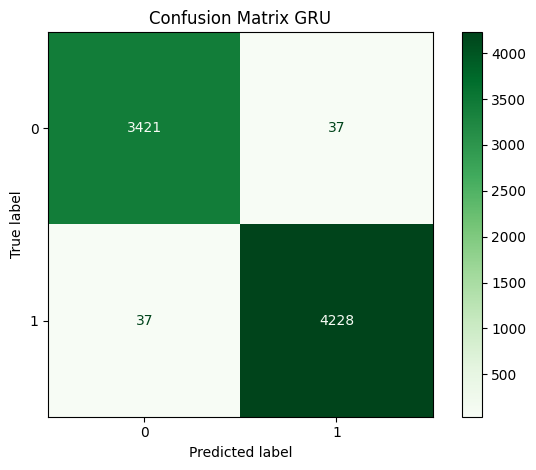

In [6]:
y_pred_probs = gru.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

classification_summary(y_test, y_pred, title="Confusion Matrix GRU", cmap="Greens")


In [7]:
gru.save(f"{models_isot_path}/gru.h5")


## LSTM

In [8]:
lstm = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    LSTM(64, return_sequences=False),
    Dense(1, activation='sigmoid')
])


/Users/katerynamelnykova/.pyenv/versions/3.12.5/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [9]:
lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
lstm.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

loss, accuracy = lstm.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.5f}")


Epoch 1/5


435/435 ━━━━━━━━━━━━━━━━━━━━ 46s 105ms/step - accuracy: 0.9192 - loss: 0.2239 - val_accuracy: 0.9832 - val_loss: 0.0625
Epoch 2/5
435/435 ━━━━━━━━━━━━━━━━━━━━ 42s 96ms/step - accuracy: 0.9905 - loss: 0.0333 - val_accuracy: 0.9828 - val_loss: 0.0543
Epoch 3/5
435/435 ━━━━━━━━━━━━━━━━━━━━ 45s 105ms/step - accuracy: 0.9911 - loss: 0.0281 - val_accuracy: 0.9848 - val_loss: 0.0572
Epoch 4/5
435/435 ━━━━━━━━━━━━━━━━━━━━ 50s 116ms/step - accuracy: 0.9957 - loss: 0.0165 - val_accuracy: 0.9754 - val_loss: 0.0801
Epoch 5/5
435/435 ━━━━━━━━━━━━━━━━━━━━ 46s 106ms/step - accuracy: 0.9987 - loss: 0.0062 - val_accuracy: 0.9828 - val_loss: 0.0632
242/242 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9880 - loss: 0.0514
Test Accuracy: 0.98563


242/242 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step
Classification Report:
              precision    recall  f1-score   support

           0    0.98719   0.98062   0.98390      3458
           1    0.98438   0.98968   0.98702      4265

    accuracy                        0.98563      7723
   macro avg    0.98578   0.98515   0.98546      7723
weighted avg    0.98564   0.98563   0.98562      7723



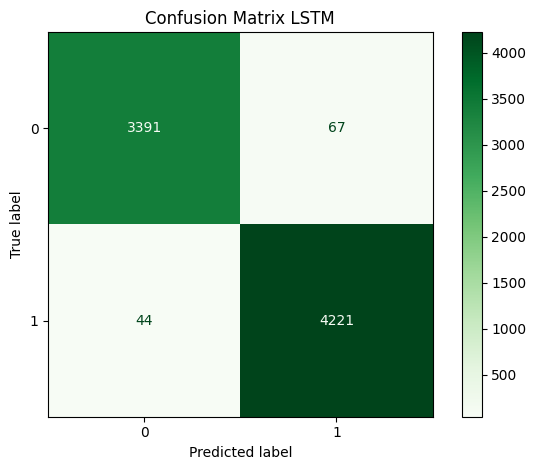

In [11]:
y_pred_probs = lstm.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

classification_summary(y_test, y_pred, title="Confusion Matrix LSTM", cmap="Greens")


In [12]:
lstm.save(f"{models_isot_path}/lstm.h5")


## Bi-LSTM

In [13]:
bi_lstm = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dense(1, activation='sigmoid')
])


/Users/katerynamelnykova/.pyenv/versions/3.12.5/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [14]:
bi_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
bi_lstm.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
bi_lstm.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

loss, accuracy = bi_lstm.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.5f}")


Epoch 1/5
435/435 ━━━━━━━━━━━━━━━━━━━━ 87s 197ms/step - accuracy: 0.9100 - loss: 0.2393 - val_accuracy: 0.9773 - val_loss: 0.0731
Epoch 2/5
435/435 ━━━━━━━━━━━━━━━━━━━━ 78s 179ms/step - accuracy: 0.9847 - loss: 0.0457 - val_accuracy: 0.9696 - val_loss: 0.1041
Epoch 3/5
435/435 ━━━━━━━━━━━━━━━━━━━━ 78s 180ms/step - accuracy: 0.9933 - loss: 0.0216 - val_accuracy: 0.9767 - val_loss: 0.0897
Epoch 4/5
435/435 ━━━━━━━━━━━━━━━━━━━━ 76s 174ms/step - accuracy: 0.9957 - loss: 0.0134 - val_accuracy: 0.9812 - val_loss: 0.0735
Epoch 5/5
435/435 ━━━━━━━━━━━━━━━━━━━━ 78s 179ms/step - accuracy: 0.9989 - loss: 0.0047 - val_accuracy: 0.9828 - val_loss: 0.0750
242/242 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9885 - loss: 0.0443
Test Accuracy: 0.98718


242/242 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step
Classification Report:
              precision    recall  f1-score   support

           0    0.98865   0.98265   0.98564      3458
           1    0.98600   0.99086   0.98842      4265

    accuracy                        0.98718      7723
   macro avg    0.98733   0.98675   0.98703      7723
weighted avg    0.98719   0.98718   0.98718      7723



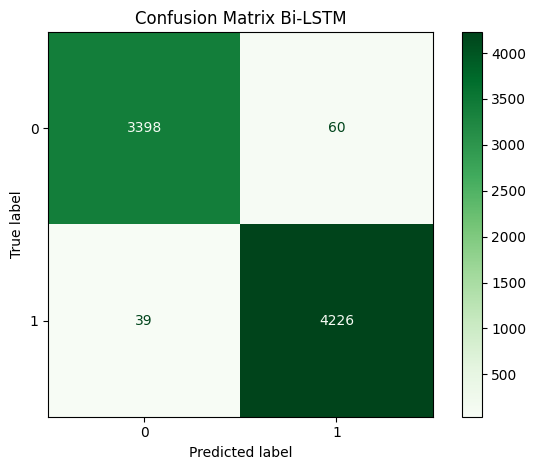

In [16]:
y_pred_probs = bi_lstm.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

classification_summary(y_test, y_pred, title="Confusion Matrix Bi-LSTM", cmap="Greens")


In [17]:
bi_lstm.save(f"{models_isot_path}/bi_lstm.h5")
